# Baseline model
The baseline model is based on the assumption that the particulate matter (PM) concentration doesn't change to much from day to day. Hence, the simplest model is that PM of today equals PM of yesterday. This model yields constant values for all days to come and will be called PM_simple in the following.

As wether predictions are quite trustworthy for the next three days to come, we'll also try a model that takes the weighted PM of the previous three days into account:

$ PM(\mathrm{day}) = \frac{w_1 PM(\mathrm{day}^{-1}) + w_2 PM(\mathrm{day}^{-2}) + w_3 PM(\mathrm{day}^{-3})}{3} 
$
$\mathrm{with\ } w_i = \mathrm{weight\ of\ day}^{-i}
$
This model yields different results for the days to come. Depending on how far the prediction reaches into the future it will be called PM_day1, PM_day2, ... in the following.

At first we'll check whether PM_simple or PM_day1 yields the best results in terms of root mean squared error (RMSE). Then we'll predict with the better baseline model the PM values of the test data.

## Import libraries

In [619]:
# fundamentals
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

#  printing of number without scientific notation
np.set_printoptions(precision=3,suppress=True)

# metric
from sklearn.metrics import mean_squared_error as MSE

## Predict all available PM values


### Load data
For testing which baseline model ist best we'll use the whole cleaned training data.

In [620]:
# load cleaned training data
df_base = pd.read_csv("../data/df_backup.csv", index_col=0)[['location_id', 'timestamp', 'city', 'lat', 'lon', 'PM10', 'PM10_std', 'PM2p5', 'PM2p5_std']]

# convert timestamp to datetime
df_base.timestamp = pd.to_datetime(df_base.timestamp)

df_base

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std
0,2,2020-01-01 00:00:00,Frankfurt,50.042000,8.436000,212.110833,24.278724,140.574167,16.827501
1,2,2020-01-01 01:00:00,Frankfurt,50.042000,8.436000,196.873043,24.933247,129.469130,16.857172
2,2,2020-01-01 02:00:00,Frankfurt,50.042000,8.436000,188.258182,36.770146,124.460455,26.337616
3,2,2020-01-01 03:00:00,Frankfurt,50.042000,8.436000,166.444500,30.844667,105.790000,21.422815
4,2,2020-01-01 04:00:00,Frankfurt,50.042000,8.436000,101.033600,18.991551,62.073600,12.735376
...,...,...,...,...,...,...,...,...,...
3193003,86,2021-12-31 19:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN
3193004,86,2021-12-31 20:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN
3193005,86,2021-12-31 21:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN
3193006,86,2021-12-31 22:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN


### Simple model: PM_simple

In [621]:
# give predicted values for PM2.5 and PM10 as PM values of previous day
df_base['PM2p5_simple'] = df_base.groupby(['location_id'])['PM2p5'].shift(24)
df_base['PM10_simple'] = df_base.groupby(['location_id'])['PM10'].shift(24)

### 3day-model: PM_day1, PM_day2, PM_day3

In [622]:
# set weights
w1, w2, w3 = 3, 2, 1

# calculate predicted values for PM10 as mean of previous three days with weights w1-w3
df_base['PM10_day1'] = (df_base.groupby(['location_id'])['PM10'].shift(24) * w1 + df_base.groupby(['location_id'])['PM10'].shift(48) * w2 + df_base.groupby(['location_id'])['PM10'].shift(72) * w3) / (w1+w2+w3) 
df_base['PM10_day2'] = (df_base.groupby(['location_id'])['PM10_day1'].shift(24) * w1 + df_base.groupby(['location_id'])['PM10'].shift(48) * w2 + df_base.groupby(['location_id'])['PM10'].shift(72) * w3) / (w1+w2+w3) 
df_base['PM10_day3'] = (df_base.groupby(['location_id'])['PM10_day2'].shift(24) * w1 + df_base.groupby(['location_id'])['PM10_day1'].shift(48) * w2 + df_base.groupby(['location_id'])['PM10'].shift(72) * w3) / (w1+w2+w3) 

# calculate predicted values for PM10 as mean of previous three days with weights w1-w3
df_base['PM2p5_day1'] = (df_base.groupby(['location_id'])['PM2p5'].shift(24) * w1 + df_base.groupby(['location_id'])['PM2p5'].shift(48) * w2 + df_base.groupby(['location_id'])['PM2p5'].shift(72) * w3) / (w1+w2+w3) 
df_base['PM2p5_day2'] = (df_base.groupby(['location_id'])['PM2p5_day1'].shift(24) * w1 + df_base.groupby(['location_id'])['PM2p5'].shift(48) * w2 + df_base.groupby(['location_id'])['PM2p5'].shift(72) * w3) / (w1+w2+w3) 
df_base['PM2p5_day3'] = (df_base.groupby(['location_id'])['PM2p5_day2'].shift(24) * w1 + df_base.groupby(['location_id'])['PM2p5_day1'].shift(48) * w2 + df_base.groupby(['location_id'])['PM2p5'].shift(72) * w3) / (w1+w2+w3) 

df_base.sample(10)
df_base.tail(30)
df_base.head(30)

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,PM2p5_simple,PM10_simple,PM10_day1,PM10_day2,PM10_day3,PM2p5_day1,PM2p5_day2,PM2p5_day3
0,2,2020-01-01 00:00:00,Frankfurt,50.042,8.436,212.110833,24.278724,140.574167,16.827501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-01-01 01:00:00,Frankfurt,50.042,8.436,196.873043,24.933247,129.469130,16.857172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-01-01 02:00:00,Frankfurt,50.042,8.436,188.258182,36.770146,124.460455,26.337616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2020-01-01 03:00:00,Frankfurt,50.042,8.436,166.444500,30.844667,105.790000,21.422815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2020-01-01 04:00:00,Frankfurt,50.042,8.436,101.033600,18.991551,62.073600,12.735376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,2020-01-01 05:00:00,Frankfurt,50.042,8.436,77.657917,8.186844,47.252500,5.255979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2,2020-01-01 06:00:00,Frankfurt,50.042,8.436,47.890417,8.750437,28.569167,5.222133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,2020-01-01 07:00:00,Frankfurt,50.042,8.436,39.997200,3.099509,23.622000,1.482667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,2020-01-01 08:00:00,Frankfurt,50.042,8.436,42.181667,3.801934,24.650000,1.571709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,2020-01-01 09:00:00,Frankfurt,50.042,8.436,38.615652,3.532186,23.673043,1.538764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


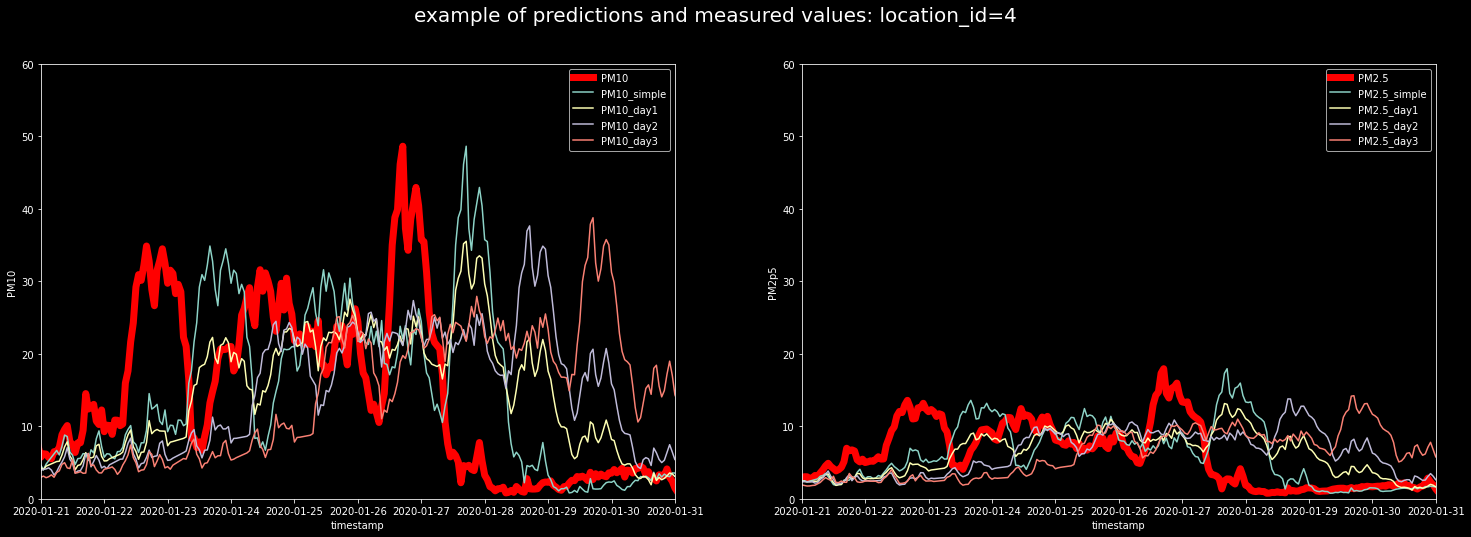

In [623]:
# plot example: prediction as function of time
location = 4 # choose location_id
plt.figure(figsize=(25, 8))
plt.suptitle(f"example of predictions and measured values: location_id={location}", fontsize=20) # title of plot

# PM10
plt.subplot(1,2,1)
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM10', color='red', linewidth=7)
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM10_simple')
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM10_day1')
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM10_day2')
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM10_day3')
plt.legend(['PM10', 'PM10_simple', 'PM10_day1', 'PM10_day2', 'PM10_day3'])
plt.xlim(pd.to_datetime('2020-01-21'),pd.to_datetime('2020-01-31'))
plt.ylim(0,60)

plt.subplot(1,2,2)
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM2p5', color='red', linewidth=7)
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM2p5_simple')
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM2p5_day1')
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM2p5_day2')
sns.lineplot(data=df_base.query(f'location_id=={location}'), x='timestamp', y='PM2p5_day3')
plt.legend(['PM2.5', 'PM2.5_simple', 'PM2.5_day1', 'PM2.5_day2', 'PM2.5_day3'])
plt.xlim(pd.to_datetime('2020-01-21'),pd.to_datetime('2020-01-31'))
plt.ylim(0,60);

(0.0, 120.0)

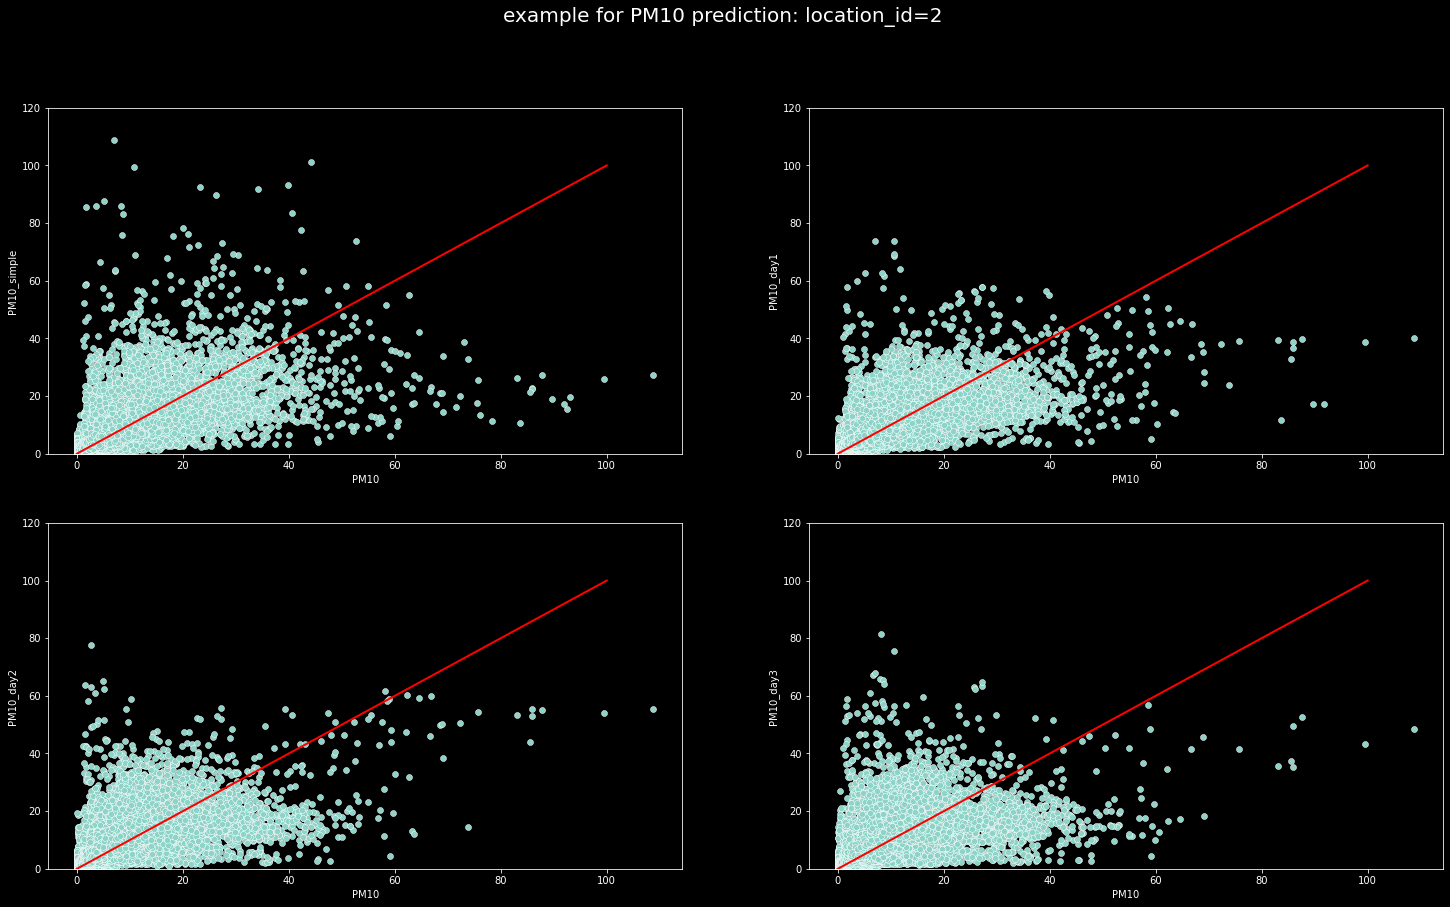

In [624]:
# plot example: prediction vs. true values
location = 2
plt.figure(figsize=(25, 14))
plt.suptitle(f"example for PM10 prediction: location_id={location}", fontsize=20) # title of plot

plt.subplot(2,2,1)
#plt.title('example: location_id=2')
sns.scatterplot(data=df_base.query(f"location_id=={location}"), x='PM10', y='PM10_simple')
plt.plot([0, 100], [0, 100], linewidth=2, color='red')
plt.ylim(0,120)

plt.subplot(2,2,2)
sns.scatterplot(data=df_base.query(f"location_id=={location}"), x='PM10', y='PM10_day1')
plt.plot([0, 100], [0, 100], linewidth=2, color='red')
plt.ylim(0,120)

plt.subplot(2,2,3)
sns.scatterplot(data=df_base.query(f"location_id=={location}"), x='PM10', y='PM10_day2')
plt.plot([0, 100], [0, 100], linewidth=2, color='red')
plt.ylim(0,120)

plt.subplot(2,2,4)
sns.scatterplot(data=df_base.query(f"location_id=={location}"), x='PM10', y='PM10_day3')
plt.plot([0, 100], [0, 100], linewidth=2, color='red')
plt.ylim(0,120)

### Root mean squared error (RMSE)

In [625]:
df_base.tail()

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,PM2p5_simple,PM10_simple,PM10_day1,PM10_day2,PM10_day3,PM2p5_day1,PM2p5_day2,PM2p5_day3
3193003,86,2021-12-31 19:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193004,86,2021-12-31 20:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193005,86,2021-12-31 21:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193006,86,2021-12-31 22:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193007,86,2021-12-31 23:00:00,Frankfurt,50.134582,8.527964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
# calculate root mean squared error (RMSE) per location, over all sensors an per city
locations = df_base.location_id.nunique() # number of locations
df_RMSE = df_base.groupby(['location_id', 'city', 'lat', 'lon']).PM10.count().reset_index().drop('PM10', axis=1) # create DataFrame of right shape

def calc_rmse(PM, base_model, df):
    """calculates RMSE for given PM type and baseline model and adds it to dataframe df_RMSE
    Args:
        PM (str): particulate matter type (PM10 or PM2.5)
        base_model (str): name of baseline model
        df (DataFrame): DataFrame with measured and predicted values
    Return: 
        rmse_all (float): RMSE for all locations, for Bremen and for Frankfurt
    """
    # RMSE for all sensors
    df_sensor = df.dropna(axis=0) # drop rows with NaN, because RMSE cannot be computed for those
    rmse_all = np.sqrt(MSE(df_sensor[PM], df_sensor[f"{PM}_{base_model}"]))
    print(f"RMSE of {PM} for all locations:", round(rmse_all,2), "µg/m3")

    # RMSE for Bremen
    df_Bremen = df_sensor[df_sensor['city'] == 'Bremen']
    rmse_Bremen = np.sqrt(MSE(df_Bremen[PM], df_Bremen[f"{PM}_{base_model}"]))

    # RMSE for Frankfurt
    df_Frankfurt = df_sensor[df_sensor['city'] == 'Frankfurt']
    rmse_Frankfurt = np.sqrt(MSE(df_Frankfurt[PM], df_Frankfurt[f"{PM}_{base_model}"]))

    # RMSE per location
    for i in range(1,locations+1):
        df_sensor = df[df['location_id']==i].dropna(axis=0) # drop rows with NaN, because RMSE cannot be computed for those
        if df_sensor.shape[0] != 0:     # check that rows for this location remain
            rmse = np.sqrt(MSE(df_sensor[f"{PM}"], df_sensor[f"{PM}_{base_model}"]))
            df_RMSE.loc[i-1,f"{PM}_{base_model}"] = rmse
    return rmse_all, rmse_Bremen, rmse_Frankfurt

RMSE of PM10 for all locations: 14.72 µg/m3
RMSE of PM2p5 for all locations: 7.57 µg/m3
RMSE of PM10 for all locations: 13.89 µg/m3
RMSE of PM2p5 for all locations: 7.11 µg/m3
RMSE of PM10 for all locations: 12.49 µg/m3
RMSE of PM2p5 for all locations: 6.33 µg/m3
RMSE of PM10 for all locations: 13.88 µg/m3
RMSE of PM2p5 for all locations: 6.95 µg/m3


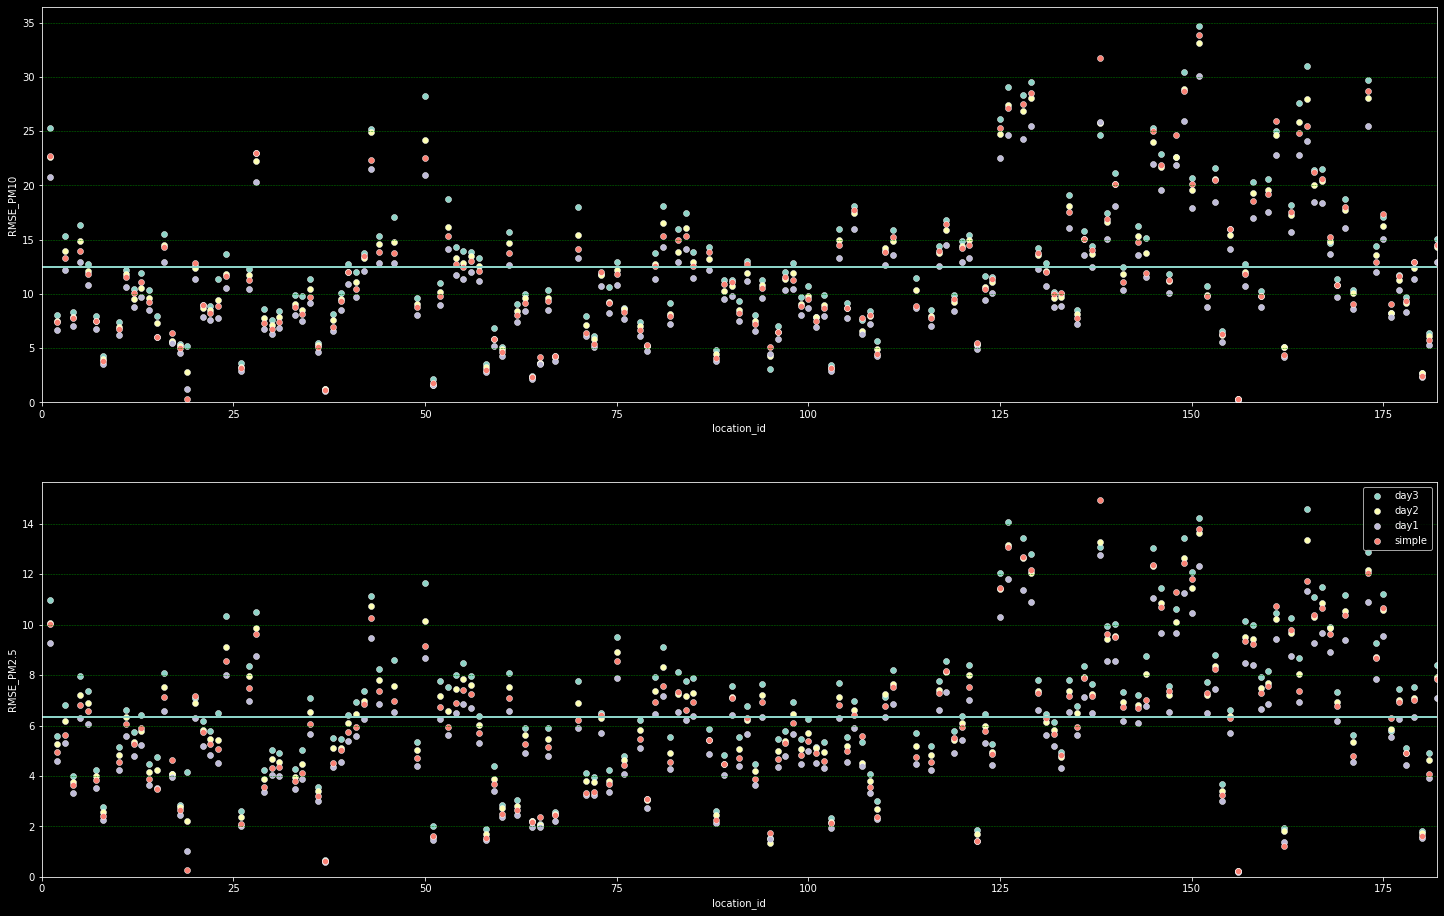

In [634]:
# save RMSE for both models for each location, for all data points, Bremen and Frankfurt, respectively and print RMSE for both models per location
base_line_models = ['day3', 'day2', 'day1', 'simple']
plt.figure(figsize=(25, 16))
rmse_all = dict()
rmse_Bremen = dict()
rmse_Frankfurt = dict()
for model in base_line_models:
    rmse_all[f"{model}_PM10"], rmse_Bremen[f"{model}_PM10"], rmse_Frankfurt[f"{model}_PM10"] = calc_rmse('PM10', model, df_base)
    rmse_all[f"{model}_PM2p5"], rmse_Bremen[f"{model}_PM2p5"], rmse_Frankfurt[f"{model}_PM2p5"] = calc_rmse('PM2p5', model, df_base)
    #df_RMSE.plot(kind='scatter', x='location_id', y=f"PM10_{model}")
    plt.subplot(2,1,1)
    sns.scatterplot(data=df_RMSE, x='location_id', y=f"PM10_{model}")
    plt.subplot(2,1,2)
    sns.scatterplot(data=df_RMSE, x='location_id', y=f"PM2p5_{model}")

plt.subplot(2,1,1)
plt.plot([0, locations], [rmse_all['day1_PM10'], rmse_all['day1_PM10']], linewidth=2)
plt.xlim(0,locations)
plt.ylabel('RMSE_PM10')
plt.grid(axis='y', color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylim(0)

plt.subplot(2,1,2)
plt.plot([0, locations], [rmse_all['day1_PM2p5'], rmse_all['day1_PM2p5']], linewidth=2)
plt.legend(base_line_models)
plt.xlim(0,locations)
plt.ylabel('RMSE_PM2.5')
plt.grid(axis='y', color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylim(0);

In [608]:
# show RMSE for all models, predicted days and sensors per city
print('Frankfurt')
display(rmse_Frankfurt)
print('Bremen')
display(rmse_Bremen)

Frankfurt


{'day3_PM10': 11.561583343778253,
 'day3_PM2p5': 6.227156217695665,
 'day2_PM10': 10.79634320265475,
 'day2_PM2p5': 5.806229936209315,
 'day1_PM10': 9.62589155126246,
 'day1_PM2p5': 5.109848562938824,
 'simple_PM10': 10.580722132485205,
 'simple_PM2p5': 5.5350453664809445}

Bremen


{'day3_PM10': 19.319267228000214,
 'day3_PM2p5': 9.603695259849415,
 'day2_PM10': 18.345705949784115,
 'day2_PM2p5': 9.073787535915045,
 'day1_PM10': 16.596151347557353,
 'day1_PM2p5': 8.13895302336586,
 'simple_PM10': 18.57225105358237,
 'simple_PM2p5': 9.027276438905158}

> The model that takes into account the weighted previous three days performs better than the simple model.
> The predictions worsen the farer they reach into the future (see day1, day2, day3).

Let's look at the RMSE for each measurement.

In [609]:
# calculate RMSE for each measurement and both models
df_PM10_simple_rmse = df_base[['PM10', 'PM10_simple']].dropna(axis=0)       
df_PM10_simple_rmse['RMSE_PM10_simple'] = np.sqrt((df_PM10_simple_rmse['PM10'] - df_PM10_simple_rmse['PM10_simple'])**2)

df_PM10_day1_rmse = df_base[['PM10', 'PM10_day1']].dropna(axis=0)       
df_PM10_day1_rmse['RMSE_PM10_day1'] = np.sqrt((df_PM10_day1_rmse['PM10'] - df_PM10_day1_rmse['PM10_day1'])**2)

df_PM10_day2_rmse = df_base[['PM10', 'PM10_day2']].dropna(axis=0)       
df_PM10_day2_rmse['RMSE_PM10_day2'] = np.sqrt((df_PM10_day2_rmse['PM10'] - df_PM10_day2_rmse['PM10_day2'])**2)

df_PM10_day3_rmse = df_base[['PM10', 'PM10_day3']].dropna(axis=0)       
df_PM10_day3_rmse['RMSE_PM10_day3'] = np.sqrt((df_PM10_day3_rmse['PM10'] - df_PM10_day3_rmse['PM10_day3'])**2)



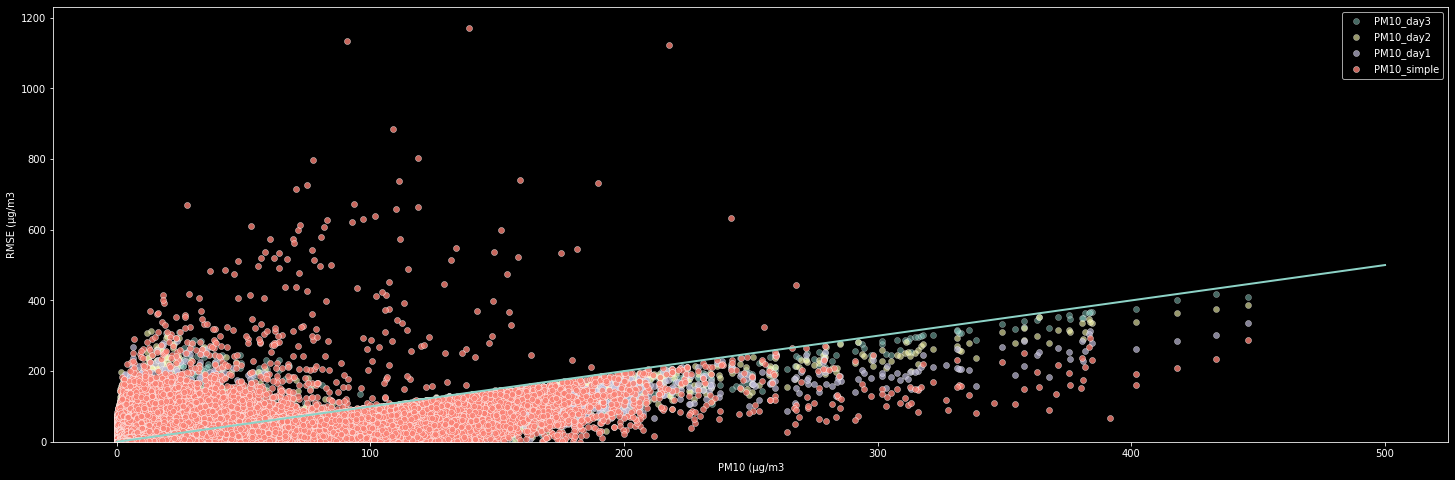

In [610]:
# plot RMSE vs. PM10
plt.figure(figsize=(25, 8))
sns.scatterplot(data=df_PM10_day3_rmse, x='PM10', y='RMSE_PM10_day3', alpha=0.5)
sns.scatterplot(data=df_PM10_day2_rmse, x='PM10', y='RMSE_PM10_day2', alpha=0.6)
sns.scatterplot(data=df_PM10_day1_rmse, x='PM10', y='RMSE_PM10_day1', alpha=0.7)
sns.scatterplot(data=df_PM10_simple_rmse, x='PM10', y='RMSE_PM10_simple', alpha=0.8)
#sns.scatterplot(data=df_PM10_1day_simple, x='PM10', y='RMSE_PM10_1day_simple', alpha=0.9)
plt.plot([0, 500], [0, 500], linewidth=2)
plt.legend(['PM10_day3', 'PM10_day2', 'PM10_day1', 'PM10_simple'])
#plt.xlim(pd.to_datetime('2020-01-21'),pd.to_datetime('2020-01-31'))
plt.ylim(0);
plt.ylabel('RMSE (µg/m3')
plt.xlabel('PM10 (µg/m3');

> The simple model works better for high PM values, but is sometime really bad for low PM10 values.

> We'll use the model taking into account the weighted last three days as baseline model.

## Predicting the test data with the baseline model

In [611]:
# load uncleaned test data
df_test = pd.read_csv("../data/processed_sensor_dwd_test.csv", index_col=0)[['timestamp', 'city', 'lat', 'lon', 'PM10', 'PM10_std', 'PM2p5', 'PM2p5_std']]

# convert timestamp to datetime
df_test.timestamp = pd.to_datetime(df_test.timestamp)

# add sensor IDs
df_location = df_test.groupby(['lat', 'lon']).count().reset_index()[['lat', 'lon']]
df_location['location_id'] = df_location.index+1
df_test = df_test.merge(df_location, on=['lat', 'lon'], how='left')

# mark test data
df_test['test'] = True

df_test.sample(10)
df_test.tail(20)
df_test.head()
#df_test.shape


,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,location_id,test
0,2022-01-01 00:00:00,Frankfurt,50.042,8.436,NaN,NaN,NaN,NaN,2,True
1,2022-01-01 01:00:00,Frankfurt,50.042,8.436,NaN,NaN,NaN,NaN,2,True
2,2022-01-01 02:00:00,Frankfurt,50.042,8.436,NaN,NaN,NaN,NaN,2,True
3,2022-01-01 03:00:00,Frankfurt,50.042,8.436,NaN,NaN,NaN,NaN,2,True
4,2022-01-01 04:00:00,Frankfurt,50.042,8.436,NaN,NaN,NaN,NaN,2,True


In [612]:
# take only last 3 days of training data
df_base_train = df_base.query("timestamp > '2021-12-28 23:00:00'")[['location_id', 'timestamp', 'city', 'lat', 'lon', 'PM10', 'PM10_std', 'PM2p5', 'PM2p5_std']]
# mark train data
df_base_train['test'] = False
df_base_train.shape

(13104, 10)

In [806]:
# merge train and test
df_base_test = pd.concat([df_base_train, df_test])

# add columns for predicted PM values
df_base_test['PM10_pred'] = np.nan
df_base_test['PM2p5_pred'] = np.nan

# sort values and reset index
df_base_test.sort_values(['timestamp', 'location_id'], inplace=True)
df_base_test.reset_index(inplace=True)
df_base_test.drop('index', axis=1, inplace=True)

df_base_test

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,test,PM10_pred,PM2p5_pred
0,1,2021-12-29 00:00:00,Frankfurt,50.032000,8.784000,NaN,NaN,NaN,NaN,False,NaN,NaN
1,2,2021-12-29 00:00:00,Frankfurt,50.042000,8.436000,1.455417,0.557900,0.751667,0.170642,False,NaN,NaN
2,3,2021-12-29 00:00:00,Frankfurt,50.046000,8.852000,NaN,NaN,NaN,NaN,False,NaN,NaN
3,4,2021-12-29 00:00:00,Frankfurt,50.050000,8.690000,3.077143,1.015963,1.280000,0.204548,False,NaN,NaN
4,5,2021-12-29 00:00:00,Frankfurt,50.054000,8.790000,NaN,NaN,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
270811,178,2022-02-28 23:00:00,Bremen,53.126000,8.760000,NaN,NaN,NaN,NaN,True,NaN,NaN
270812,179,2022-02-28 23:00:00,Bremen,53.131823,8.732302,29.000000,2.167469,14.251818,0.638940,True,NaN,NaN
270813,180,2022-02-28 23:00:00,Bremen,53.132000,8.708000,5.765263,0.447950,5.185789,0.387317,True,NaN,NaN
270814,181,2022-02-28 23:00:00,Bremen,53.132000,8.732000,NaN,NaN,NaN,NaN,True,NaN,NaN


In [813]:
def predict_PM(PM, df):
    """predicts PM values for test data and saves them in columns of df

    Args:
        PM (str): PM type (PM10 or PM2p5)
        df (DataFrame): DataFrame with three days of train data and target test data
    """
    # set weights
    w1, w2, w3 = 3, 2, 1
    day1 = df['timestamp'].dt.date.min() + pd.Timedelta(days=3) # first test date
    last_day = df['timestamp'].dt.date.max() # last test date
    # days to be predicted
    days = (last_day - day1).days

    # calculate predicted values for PM as mean of previous three days with weights w1-w3 for day 1
    end = df.query(f"'{day1} 23:00:00' == timestamp").index.max()
    df.loc[0:end,f'{PM}_pred_1'] = (df.loc[0:end].groupby(['location_id'])[f'{PM}'].shift(24) * w1 + df.loc[0:end].groupby(['location_id'])[f'{PM}'].shift(48) * w2 + df.loc[0:end].groupby(['location_id'])[f'{PM}'].shift(72) * w3) / (w1+w2+w3) 
    # day2
    end = df.query(f"'{day1 + pd.Timedelta(hours=24)} 23:00:00' == timestamp").index.max()
    df.loc[0:end,f'{PM}_pred_2'] = (df.loc[0:end].groupby(['location_id'])[f'{PM}_pred_1'].shift(24) * w1 + df.loc[0:end].groupby(['location_id'])[f'{PM}'].shift(48) * w2 + df.loc[0:end].groupby(['location_id'])[f'{PM}'].shift(72) * w3) / (w1+w2+w3) 
    # day3
    end = df.query(f"'{day1 + pd.Timedelta(hours=48)} 23:00:00' == timestamp").index.max()
    df.loc[0:end,f'{PM}_pred_3'] = (df.loc[0:end].groupby(['location_id'])[f'{PM}_pred_2'].shift(24) * w1 + df.loc[0:end].groupby(['location_id'])[f'{PM}_pred_1'].shift(48) * w2 + df.loc[0:end].groupby(['location_id'])[f'{PM}'].shift(72) * w3) / (w1+w2+w3) 

    # day4 to end of prediction
    for day in range (4, days+1):
        end = df.query(f"'{day1 + pd.Timedelta(hours=(day-1)*24)} 23:00:00' == timestamp").index.max()
        df.loc[0:end,f'{PM}_pred_{day}'] = (df.loc[0:end].groupby(['location_id'])[f'{PM}_pred_{day-1}'].shift(24) * w1 + df.loc[0:end].groupby(['location_id'])[f'{PM}_pred_{day-2}'].shift(48) * w2 + df.loc[0:end].groupby(['location_id'])[f'{PM}_pred_{day-3}'].shift(72) * w3) / (w1+w2+w3) 

    # coalesce predicted values in one column
    for day in range(1, days+1):
        df[f'{PM}_pred'] = df[f'{PM}_pred'].combine_first(df[f'{PM}_pred_{day}'])
        df.drop(f'{PM}_pred_{day}', axis=1, inplace=True)
    pass


In [833]:
# predict
predict_PM('PM10', df_base_test)
predict_PM('PM2p5', df_base_test)

In [834]:
# show results at given location and for fixed hour
df_base_test.query("location_id==4").loc[4050::24].head(10)

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,test,PM10_pred,PM2p5_pred,date,day
4189,4,2021-12-29 23:00:00,Frankfurt,50.05,8.69,16.582381,2.435767,10.200952,1.276922,False,NaN,NaN,2021-12-29,-2
8557,4,2021-12-30 23:00:00,Frankfurt,50.05,8.69,5.034091,1.213059,2.777273,0.211146,False,NaN,NaN,2021-12-30,-1
12925,4,2021-12-31 23:00:00,Frankfurt,50.05,8.69,17.916667,7.272228,12.376190,4.659368,False,NaN,NaN,2021-12-31,0
17293,4,2022-01-01 23:00:00,Frankfurt,50.05,8.69,15.356190,2.132160,9.295238,0.484186,True,13.400094,8.814012,2022-01-01,1
21661,4,2022-01-02 23:00:00,Frankfurt,50.05,8.69,6.285556,1.648230,2.444444,0.297998,True,13.511284,8.995281,2022-01-02,2
26029,4,2022-01-03 23:00:00,Frankfurt,50.05,8.69,9.872381,1.956282,5.197619,1.091462,True,14.208451,9.498343,2022-01-03,3
30397,4,2022-01-04 23:00:00,Frankfurt,50.05,8.69,9.690000,1.561230,7.204091,0.696499,True,13.841336,9.216601,2022-01-04,4
34765,4,2022-01-05 23:00:00,Frankfurt,50.05,8.69,7.733636,1.714639,3.218636,0.245421,True,13.908699,9.273628,2022-01-05,5
39133,4,2022-01-06 23:00:00,Frankfurt,50.05,8.69,17.599412,2.086320,7.607059,0.382766,True,13.936203,9.292071,2022-01-06,6
43501,4,2022-01-07 23:00:00,Frankfurt,50.05,8.69,12.010455,2.629370,7.977273,1.232211,True,13.911224,9.273345,2022-01-07,7


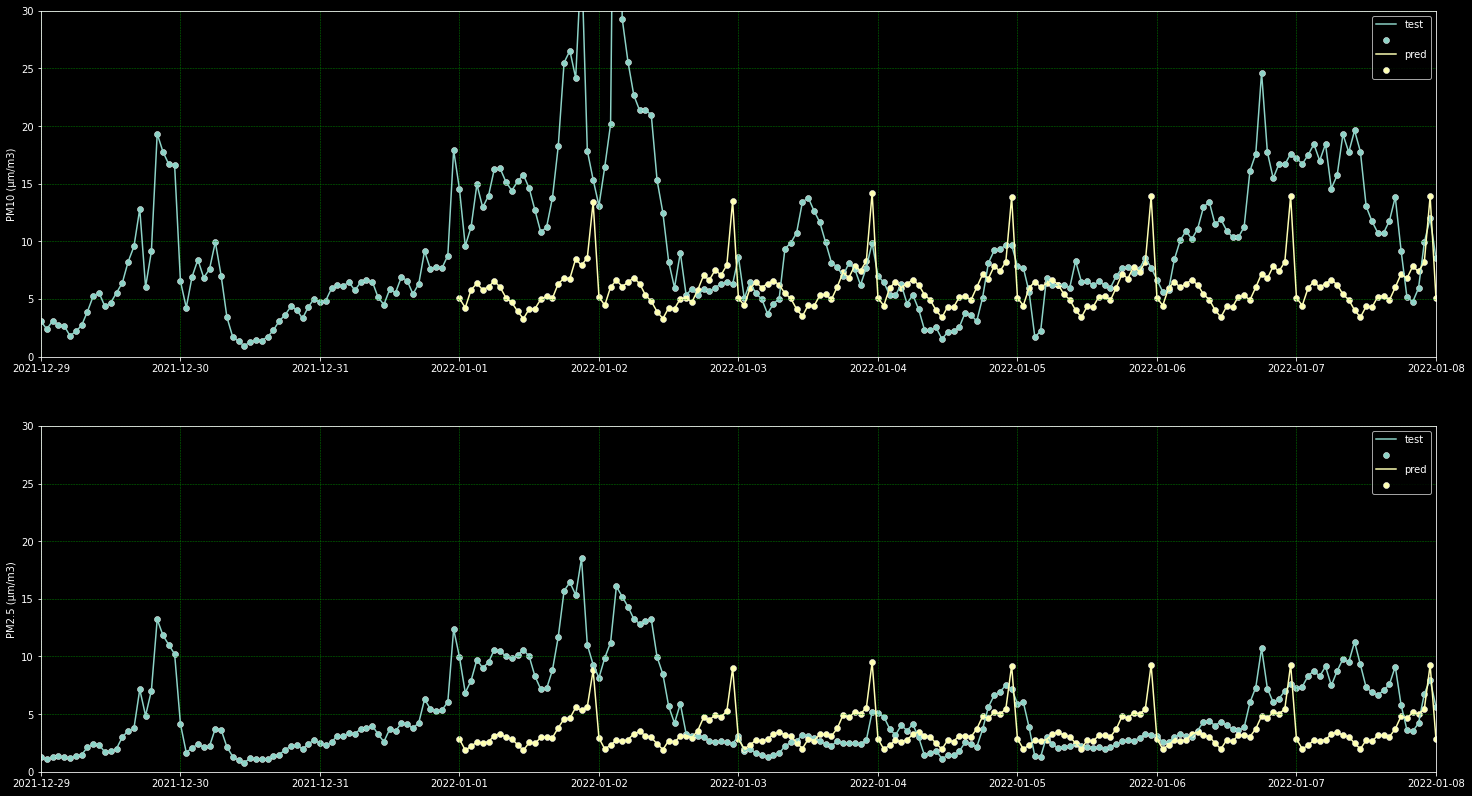

In [821]:
# plot example: prediction vs. true values
location = 4
plt.figure(figsize=(25, 14))
plt.title(f"example for comparison of measured and predicted PM10 values: location_id={location}", fontsize=20) # title of plot

plt.subplot(2,1,1)
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM10', legend='auto')
sns.scatterplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM10')
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM10_pred', legend='auto')
sns.scatterplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM10_pred')
plt.xlim(pd.to_datetime('2021-12-29'),pd.to_datetime('2022-01-08'))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylim(0,30)
plt.xlabel('')
plt.ylabel('PM10 (µm/m3)')
plt.legend(['test', '','pred', ''])

plt.subplot(2,1,2)
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM2p5', legend='auto')
sns.scatterplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM2p5')
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM2p5_pred', legend='auto')
sns.scatterplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y='PM2p5_pred')
plt.xlim(pd.to_datetime('2021-12-29'),pd.to_datetime('2022-01-08'))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylim(0,30)
plt.xlabel('')
plt.ylabel('PM2.5 (µm/m3)')
plt.legend(['test', '','pred', ''])


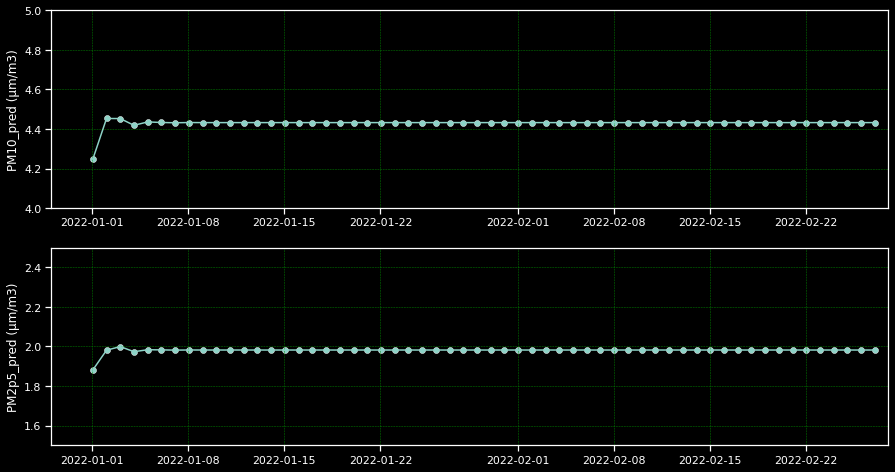

In [840]:
# plot example: prediction vs. true values for one hour of the day
location = 4
plt.figure(figsize=(15, 8))
plt.title(f"example for PM10 predicted with baseline model: location_id={location}", fontsize=20) # title of plot

plt.subplot(2,1,1)
sns.lineplot(data=df_base_test.query(f"location_id=={location}")[1::24], x='timestamp', y='PM10_pred', legend='auto')
sns.scatterplot(data=df_base_test.query(f"location_id=={location}")[1::24], x='timestamp', y='PM10_pred')
plt.xlim(pd.to_datetime('2021-12-29'),pd.to_datetime('2022-02-28'))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylim(4,5)
plt.xlabel('')
plt.ylabel('PM10_pred (µm/m3)')

plt.subplot(2,1,2)
sns.lineplot(data=df_base_test.query(f"location_id=={location}")[1::24], x='timestamp', y='PM2p5_pred', legend='auto')
sns.scatterplot(data=df_base_test.query(f"location_id=={location}")[1::24], x='timestamp', y='PM2p5_pred')
plt.xlim(pd.to_datetime('2021-12-29'),pd.to_datetime('2022-02-28'))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.ylim(1.5,2.5)
plt.xlabel('')
plt.ylabel('PM2p5_pred (µm/m3)');

> prediction flattens quite fast

### Root mean squared error (RMSE)

In [829]:
# calculate root mean squared error (RMSE) per location, over all sensors an per city
# add day number to dataframe
df_base_test['date'] = (df_base_test['timestamp'].dt.date)
df_base_test['day'] = df_base_test['date'].apply(lambda x: (x - day1 + pd.Timedelta(days=1)).days)

# create DataFrame of right shape
df_RMSE_base = df_base_test.groupby(['date', 'day']).PM10.count().reset_index().drop('PM10', axis=1) 



def calc_rmse_base(PM, df):
    """calculates RMSE and add it to dataframe df_RMSE_base
    Args:
        PM (str): particulate matter type (PM10 or PM2.5)
                df (DataFrame): DataFrame with measured and predicted values
    Return: 
        rmse_all (float): RMSE for all locations, for Bremen and for Frankfurt
    """
    day1 = df['timestamp'].dt.date.min() + pd.Timedelta(days=3) # first test date
    last_day = df['timestamp'].dt.date.max() # last test date
    # days to be predicted
    days = (last_day - day1).days
    # RMSE for all days
    df_day = df.dropna(axis=0) # drop rows with NaN, because RMSE cannot be computed for those
    rmse_all = np.sqrt(MSE(df_day[PM], df_day[f"{PM}_pred"]))
    print(f"RMSE of {PM} for all days:", round(rmse_all,2), "µg/m3")

    # RMSE for Bremen
    df_Bremen = df_day[df_day['city'] == 'Bremen']
    rmse_Bremen = np.sqrt(MSE(df_Bremen[PM], df_Bremen[f"{PM}_pred"]))

    # RMSE for Frankfurt
    df_Frankfurt = df_day[df_day['city'] == 'Frankfurt']
    rmse_Frankfurt = np.sqrt(MSE(df_Frankfurt[PM], df_Frankfurt[f"{PM}_pred"]))

    # RMSE per location
    for day in range(1,days+1):
        df_day = df[df['day'] == day].dropna(axis=0) # drop rows with NaN, because RMSE cannot be computed for those
        if df_day.shape[0] != 0:     # check that rows for this location remain
            rmse = np.sqrt(MSE(df_day[f"{PM}"], df_day[f"{PM}_pred"]))
            df_RMSE_base.loc[day+2,f"RMSE_{PM}_pred"] = rmse
    return rmse_all, rmse_Bremen, rmse_Frankfurt

In [831]:
df_RMSE_base

,date,day,RMSE_PM10_pred
0,2021-12-29,-2,NaN
1,2021-12-30,-1,NaN
2,2021-12-31,0,NaN
3,2022-01-01,1,18.241086
4,2022-01-02,2,16.094464
...,...,...,...
57,2022-02-24,55,10.993862
58,2022-02-25,56,7.589582
59,2022-02-26,57,9.308443
60,2022-02-27,58,9.151695


RMSE of PM10 for all days: 16.74 µg/m3
RMSE of PM2p5 for all days: 7.72 µg/m3


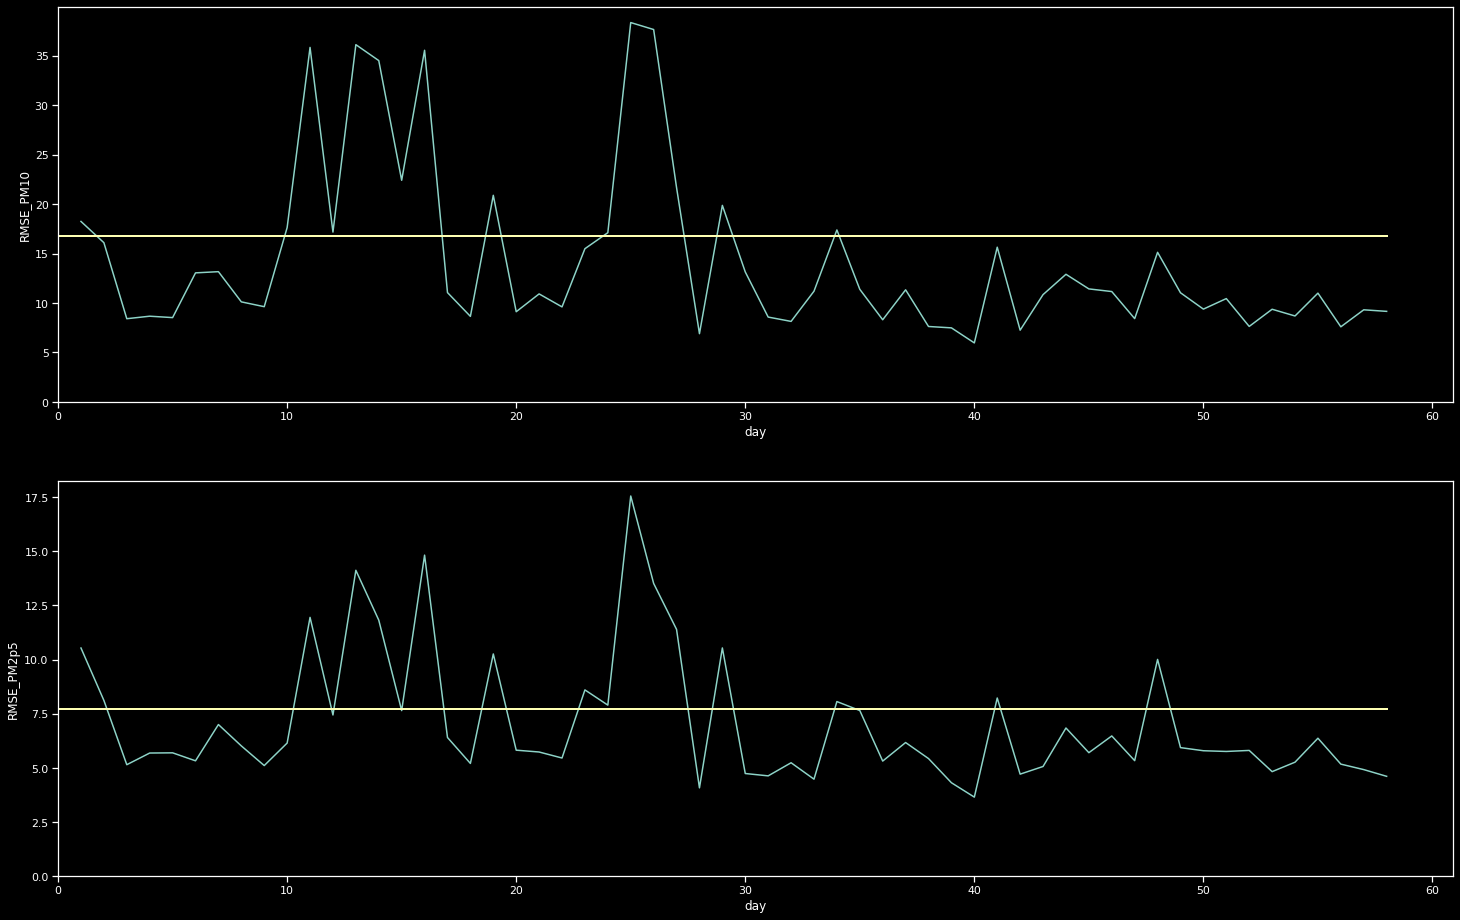

In [838]:
# calculate RMSE for both models for each location, for all data points, Bremen and Frankfurt, respectively and print RMSE for both models per location
rmse_all = dict()
rmse_Bremen = dict()
rmse_Frankfurt = dict()

plt.figure(figsize=(25, 16))

rmse_all["PM10_pred"], rmse_Bremen["PM10_pred"], rmse_Frankfurt["PM10_pred"] = calc_rmse_base('PM10',  df_base_test)
rmse_all["PM2p5_pred"], rmse_Bremen["PM2p5_pred"], rmse_Frankfurt["PM2p5_pred"] = calc_rmse_base('PM2p5',  df_base_test)

sns.set_context('notebook')
plt.subplot(2,1,1)
sns.lineplot(data=df_RMSE_base, x='day', y="RMSE_PM10_pred")
plt.plot([0, days], [rmse_all['PM10_pred'], rmse_all['PM10_pred']], linewidth=2)
plt.ylim(0)
plt.xlim(0)
plt.ylabel('RMSE_PM10')

plt.subplot(2,1,2)
sns.lineplot(data=df_RMSE_base, x='day', y="RMSE_PM2p5_pred")
plt.plot([0, days], [rmse_all['PM2p5_pred'], rmse_all['PM2p5_pred']], linewidth=2)
plt.ylim(0)
plt.xlim(0)
plt.ylabel('RMSE_PM2p5');

In [848]:
# calculate RMSE per measurement
df_base_test['RMSE_PM10'] = np.sqrt((df_base_test['PM10'] - df_base_test['PM10_pred'])**2)
df_base_test['RMSE_PM2p5'] = np.sqrt((df_base_test['PM2p5'] - df_base_test['PM2p5_pred'])**2)
df_base_test.query("location_id==4").loc[4050::24].head(10)

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,test,PM10_pred,PM2p5_pred,date,day,RMSE_PM10,RMSE_PM2p5
4189,4,2021-12-29 23:00:00,Frankfurt,50.05,8.69,16.582381,2.435767,10.200952,1.276922,False,NaN,NaN,2021-12-29,-2,NaN,NaN
8557,4,2021-12-30 23:00:00,Frankfurt,50.05,8.69,5.034091,1.213059,2.777273,0.211146,False,NaN,NaN,2021-12-30,-1,NaN,NaN
12925,4,2021-12-31 23:00:00,Frankfurt,50.05,8.69,17.916667,7.272228,12.376190,4.659368,False,NaN,NaN,2021-12-31,0,NaN,NaN
17293,4,2022-01-01 23:00:00,Frankfurt,50.05,8.69,15.356190,2.132160,9.295238,0.484186,True,13.400094,8.814012,2022-01-01,1,1.956097,0.481227
21661,4,2022-01-02 23:00:00,Frankfurt,50.05,8.69,6.285556,1.648230,2.444444,0.297998,True,13.511284,8.995281,2022-01-02,2,7.225729,6.550837
26029,4,2022-01-03 23:00:00,Frankfurt,50.05,8.69,9.872381,1.956282,5.197619,1.091462,True,14.208451,9.498343,2022-01-03,3,4.336070,4.300724
30397,4,2022-01-04 23:00:00,Frankfurt,50.05,8.69,9.690000,1.561230,7.204091,0.696499,True,13.841336,9.216601,2022-01-04,4,4.151336,2.012510
34765,4,2022-01-05 23:00:00,Frankfurt,50.05,8.69,7.733636,1.714639,3.218636,0.245421,True,13.908699,9.273628,2022-01-05,5,6.175063,6.054992
39133,4,2022-01-06 23:00:00,Frankfurt,50.05,8.69,17.599412,2.086320,7.607059,0.382766,True,13.936203,9.292071,2022-01-06,6,3.663208,1.685013
43501,4,2022-01-07 23:00:00,Frankfurt,50.05,8.69,12.010455,2.629370,7.977273,1.232211,True,13.911224,9.273345,2022-01-07,7,1.900770,1.296072


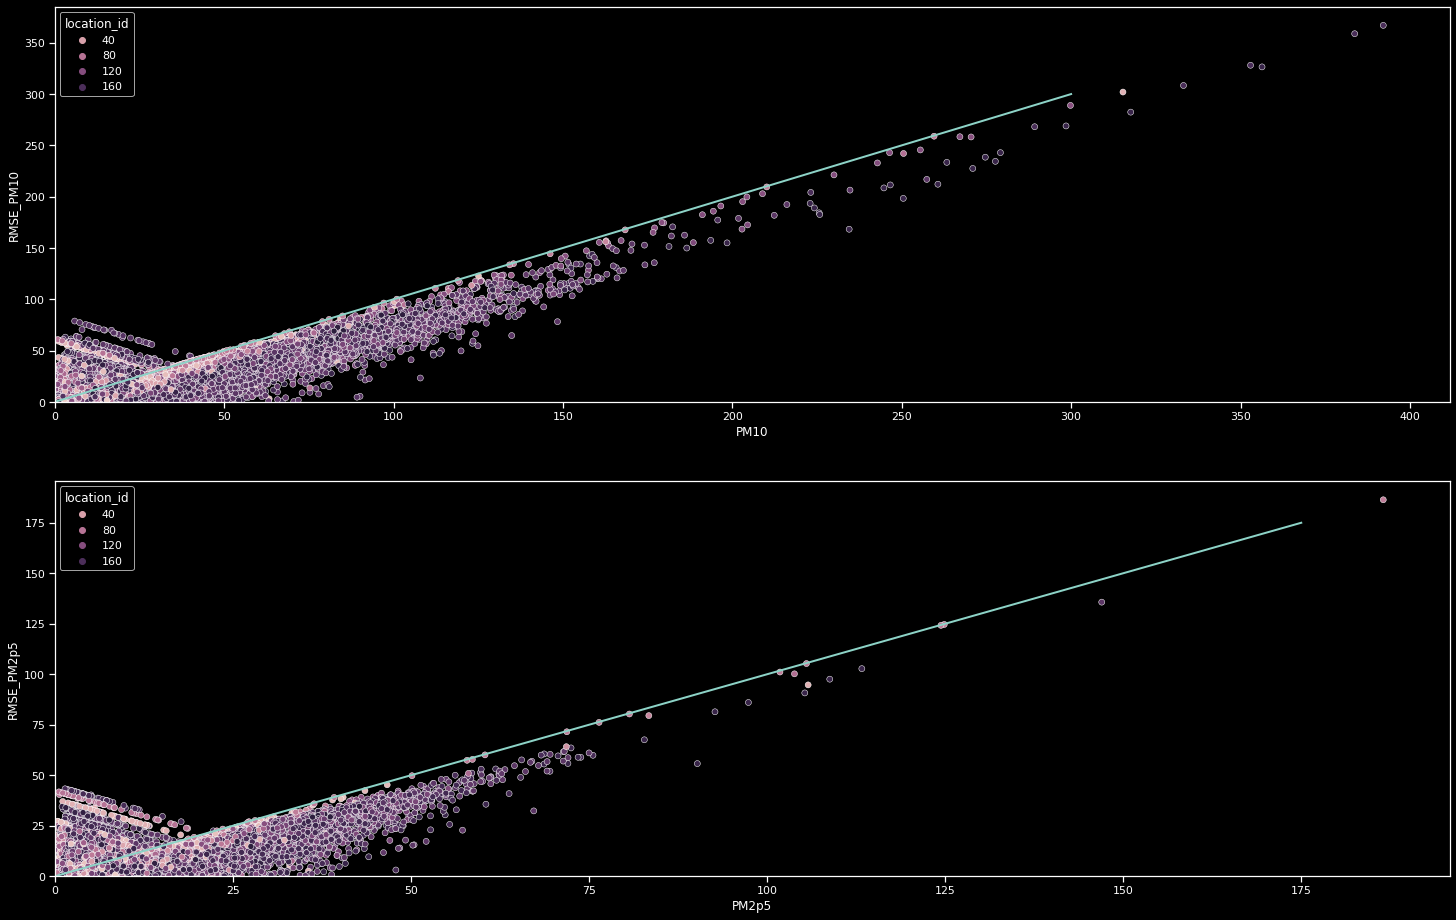

In [899]:
# plot PM_pred vs PM
plt.figure(figsize=(25, 16))

plt.subplot(2,1,1)
sns.scatterplot(data=df_base_test, x='PM10', y="RMSE_PM10", hue='location_id')
plt.plot([0, 350], [0, 350], linewidth=2)
plt.ylim(0)
plt.xlim(0)
plt.ylabel('RMSE_PM10')

plt.subplot(2,1,2)
sns.scatterplot(data=df_base_test, x='PM2p5', y="RMSE_PM2p5", hue='location_id')
plt.plot([0, 175], [0, 175], linewidth=2)
plt.ylim(0)
plt.xlim(0)
plt.ylabel('RMSE_PM2p5');

In [863]:
df_base_test

,location_id,timestamp,city,lat,lon,PM10,PM10_std,PM2p5,PM2p5_std,test,PM10_pred,PM2p5_pred,date,day,RMSE_PM10,RMSE_PM2p5
0,1,2021-12-29 00:00:00,Frankfurt,50.032000,8.784000,NaN,NaN,NaN,NaN,False,NaN,NaN,2021-12-29,-2,NaN,NaN
1,2,2021-12-29 00:00:00,Frankfurt,50.042000,8.436000,1.455417,0.557900,0.751667,0.170642,False,NaN,NaN,2021-12-29,-2,NaN,NaN
2,3,2021-12-29 00:00:00,Frankfurt,50.046000,8.852000,NaN,NaN,NaN,NaN,False,NaN,NaN,2021-12-29,-2,NaN,NaN
3,4,2021-12-29 00:00:00,Frankfurt,50.050000,8.690000,3.077143,1.015963,1.280000,0.204548,False,NaN,NaN,2021-12-29,-2,NaN,NaN
4,5,2021-12-29 00:00:00,Frankfurt,50.054000,8.790000,NaN,NaN,NaN,NaN,False,NaN,NaN,2021-12-29,-2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270811,178,2022-02-28 23:00:00,Bremen,53.126000,8.760000,NaN,NaN,NaN,NaN,True,NaN,NaN,2022-02-28,59,NaN,NaN
270812,179,2022-02-28 23:00:00,Bremen,53.131823,8.732302,29.000000,2.167469,14.251818,0.638940,True,NaN,NaN,2022-02-28,59,NaN,NaN
270813,180,2022-02-28 23:00:00,Bremen,53.132000,8.708000,5.765263,0.447950,5.185789,0.387317,True,NaN,NaN,2022-02-28,59,NaN,NaN
270814,181,2022-02-28 23:00:00,Bremen,53.132000,8.732000,NaN,NaN,NaN,NaN,True,NaN,NaN,2022-02-28,59,NaN,NaN


mean RMSE_PM10 for location 4 = 7.72 µg/m3
mean RMSE_PM2p5 for location 4 = 3.66 µg/m3


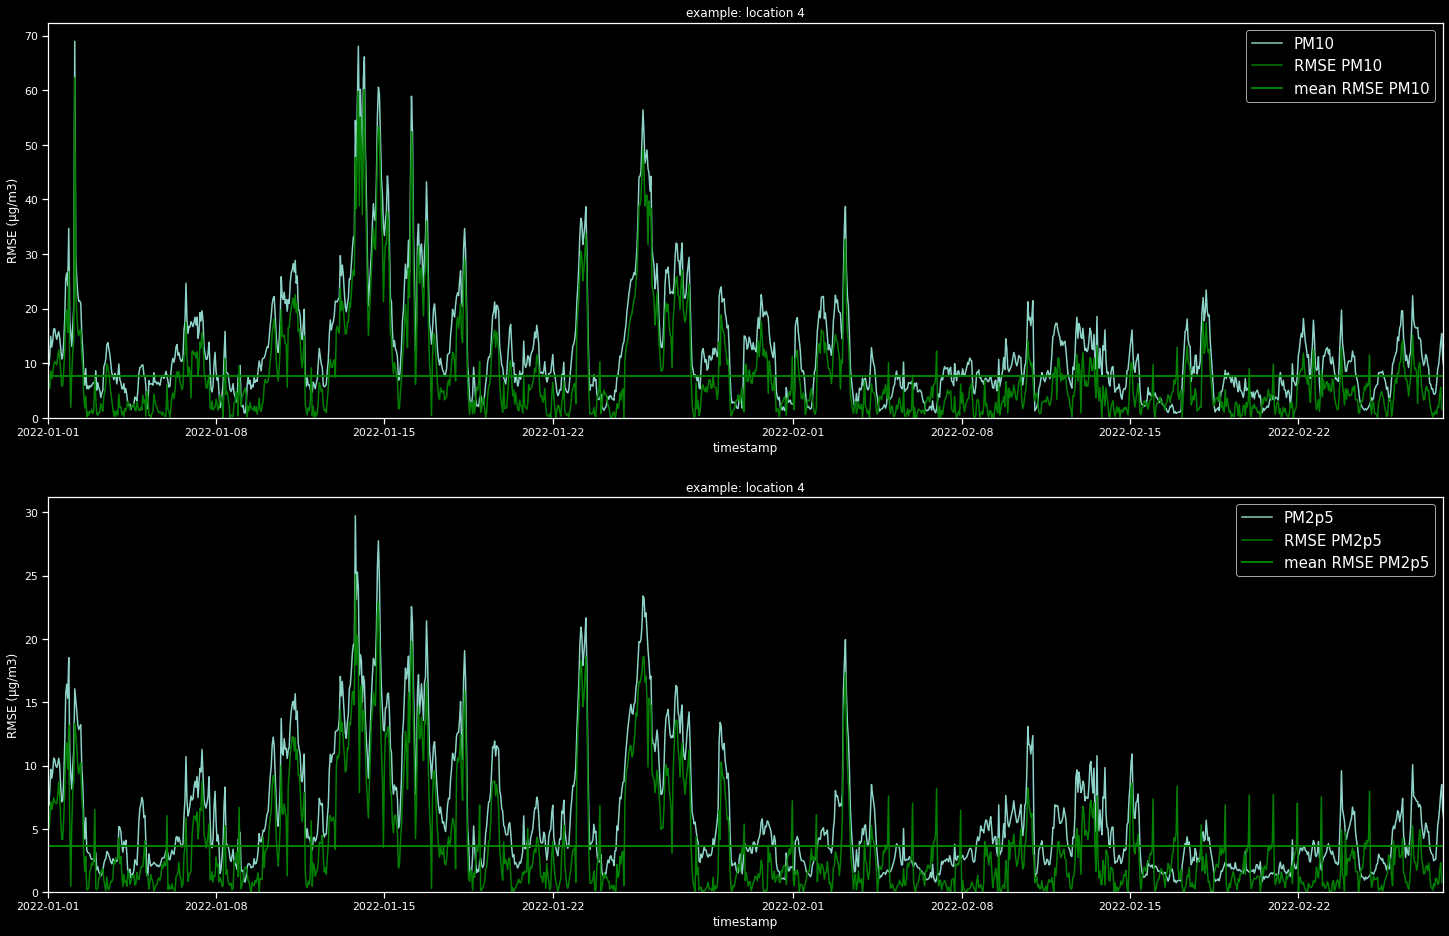

In [898]:
# plot for exemplarily location
location = 4
plt.figure(figsize=(25, 16))

# PM10
plt.subplot(2,1,1)
mean_PM10 = df_base_test.query(f"location_id=={location}")['RMSE_PM10'].mean()
print(f'mean RMSE_PM10 for location {location} = {round(mean_PM10,2)} µg/m3')
plt.title(f'example: location {location}')
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y="PM10")
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y="RMSE_PM10", color='green')
plt.plot([pd.to_datetime('2022-01-01'), pd.to_datetime('2022-02-28')], [mean_PM10, mean_PM10], linewidth=2, color='green')
#sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y="PM10_pred")
plt.ylim(0)
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-02-28'))
plt.ylabel('RMSE (µg/m3)')
plt.legend(['PM10', 'RMSE PM10', 'mean RMSE PM10'], fontsize=15)

# PM 2.5
plt.subplot(2,1,2)
mean_PM2p5 = df_base_test.query(f"location_id=={location}")['RMSE_PM2p5'].mean()
print(f'mean RMSE_PM2p5 for location {location} = {round(mean_PM2p5,2)} µg/m3')
plt.title(f'example: location {location}')
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y="PM2p5")
sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y="RMSE_PM2p5", color='green')
plt.plot([pd.to_datetime('2022-01-01'), pd.to_datetime('2022-02-28')], [mean_PM2p5, mean_PM2p5], linewidth=2, color='green')
#sns.lineplot(data=df_base_test.query(f"location_id=={location}"), x='timestamp', y="PM2p5_pred")
plt.ylim(0)
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2022-02-28'))
plt.ylabel('RMSE (µg/m3)')
plt.legend(['PM2p5', 'RMSE PM2p5', 'mean RMSE PM2p5'], fontsize=15)



In [ ]:
#sns.axes_style("darkgrid")
#sns.set_theme()

# plotten für die präsi
def plot_model(model, forecast, file):

    fig = model.plot(forecast, xlabel='Date', ylabel='Value', figsize=(20, 12))
    ax = fig.gca()
    #ax.set_title("Title", size=34)
    ax.set_xlabel("Date", size=34)
    ax.set_ylabel("PM 2.5 in µm/m³", size=34)
    ax.tick_params(axis="x", labelsize=24)
    ax.tick_params(axis="y", labelsize=24)
    ax.set_ylim(0,150)

    fig.savefig(file, bbox_inches='tight', facecolor="#EEEEEE")

    plt.show()